<a href="https://colab.research.google.com/github/Pasprihod/Math/blob/main/%D0%A3%D1%80%D0%BE%D0%BA_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3. Задание (в программе или на листочке)
На листе тетради «в линейку» (расстояние между линиями равно а) лежит игла (длиной b). Координаты нижней точки иглы (х,у), игла лежит под углом alfa. Пересекает ли игла линию или нет?

Игла пересекает линию


(-2.5, 52.5, -2.5, 52.5)

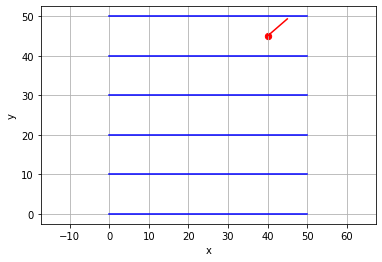

In [27]:
import matplotlib.pyplot as plt
import numpy as np

a = 10
b = 10
x0,y0 = (40, 45)
alpha = np.pi/3 # от 0 до pi
metric = (y0 % a + b*np.sin(alpha)) // a
if metric >= 1:
  print('Игла пересекает линию')
else:
  print('Игла  не пересекает линию')

x = np.linspace(0,50,50)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
for i in range(y0//a+2): # линии в тетради
  plt.plot([0,50], [i*a,i*a],'b')

plt.scatter(x0,y0,40,'r') # нижняя точка иглы

if alpha < np.pi/2: # рисуем иглу, в зависимости от угла
  x=np.linspace(x0,x0+b*np.cos(alpha),1000)
  y=y0+(x-x0)*np.sin(alpha)
elif alpha == np.pi/2:
  x=[x0,x0]
  y=[y0,y0+b]  
else: 
  x=np.linspace(x0+b*np.cos(alpha), x0, 1000)
  y=y0+(x0-x)*np.sin(alpha)

plt.plot(x,y, 'r')
plt.axis('equal')

4. Задание** (задание делать по желанию)
Решите аналитически и потом численно (в программе) уравнение, зависящее от параметра а: 
sin(а*x)=0
при условии: 0.01<a<0.02, 100<х<500.
Т.е. надо найти решение х как функцию параметра а - построить график x=x(а).
Если численным методом не получается найти все ветви решения x(а), то отыщите хотя бы одну.


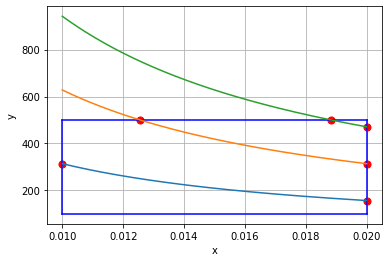

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

def f(p):
  return (np.sin(p))
x=np.linspace(100,500,100)
a=np.linspace(0.01,0.02,200)
p_range=np.linspace(1,10,30) # p = x*a

sol = np.unique([round(fsolve(f, p)[0],2) for p in p_range])

# определяем решения, удовлетворяющие ОДЗ
sol1=[]
for i in range(len(sol)):
  for ai in a:
    xi = round(sol[i]/ai,2) 
    if 100 <= xi <= 500:
      sol1.append(sol[i])
      break
sol=sol1

# определяем координаты пересечения решений с границами ОДЗ
coord = {}
for i in range(len(sol)):
  coord[i] = []
  for ai in a:
    xi = round(sol[i]/ai,2)
    if (ai == 0.01 or ai == 0.02) and 100 <= xi <= 500:
      coord[i].append([ai,xi])
    if 99 <xi < 101 or 499< xi < 501:
      coord[i].append([ai,round(xi)])  
    
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

# рисуем ОДЗ
plt.plot([0.01, 0.01],[100, 500],'b')
plt.plot([0.02, 0.02],[100, 500],'b')
plt.plot([0.01, 0.02],[100, 100],'b')
plt.plot([0.01, 0.02],[500, 500],'b')

# рисуем графики решений
for i in range(len(sol)):
  plt.plot(a, sol[i]/a)
  

# рисуем точки пересечений решений и границ ОДЗ
for i in coord.keys():
  for j in coord[i]:
    plt.scatter(j[0], j[1], 50, 'r')


